In [1]:
!pip3 install torch torchvision

  Using cached https://files.pythonhosted.org/packages/49/0e/e382bcf1a6ae8225f50b99cc26effa2d4cc6d66975ccf3fa9590efcbedce/torch-0.4.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/ca/0d/f00b2885711e08bd71242ebe7b96561e6f6d01fdb4b9dcf4d37e2e13c5e1/torchvision-0.2.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/67/4b/141a581104b1f6397bfa78ac9d43d8ad29a7ca43ea90a2d863fe3056e86a/six-1.11.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/d1/24/f53ff6b61b3d728b90934bddb4f03f8ab584a7f49299bf3bde56e2952612/Pillow-5.2.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/fe/94/7049fed8373c52839c8cde619acaf2c9b83082b935e5aa8c0fa27a4a8bcc/numpy-1.15.1-cp36-cp36m-manylinux1_x86_64.whl


In [2]:

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001


In [4]:
# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [5]:
# Linear regression model
model = nn.Linear(input_size, output_size)


In [6]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  


In [7]:
# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))


Epoch [5/60], Loss: 4.5410
Epoch [10/60], Loss: 2.0670
Epoch [15/60], Loss: 1.0645
Epoch [20/60], Loss: 0.6580
Epoch [25/60], Loss: 0.4930
Epoch [30/60], Loss: 0.4258
Epoch [35/60], Loss: 0.3983
Epoch [40/60], Loss: 0.3868
Epoch [45/60], Loss: 0.3819
Epoch [50/60], Loss: 0.3795
Epoch [55/60], Loss: 0.3783
Epoch [60/60], Loss: 0.3774


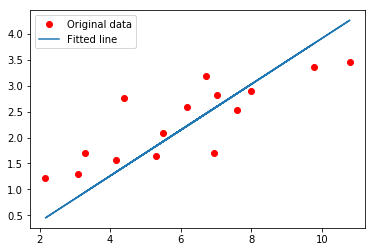

In [8]:
# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

In [9]:
# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')